In [6]:
# Standard imports
import sys
import time
import logging
from pathlib import Path

from itertools import combinations

# Standard scientific imports
import numpy as np
import pandas as pd
from numpy.random import default_rng
from scipy.integrate import trapezoid

# Plotting imports
import matplotlib.pyplot as plt
import cmasher as cmr

# Astronomy imports
import astropy.units as u
from astropy.units.quantity import Quantity
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D


In [2]:
# Matplotlib style
try:
    plt.style.use('paper')
    plt.style.use('kraken')
except:
    pass

In [3]:
# Astropalmerio specific imports
import astropalmerio.io as io
import astropalmerio.spectra as sp
import astropalmerio.galaxies as gal
import astropalmerio.mc as mc

In [5]:
log = logging.getLogger(__name__)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG,
                    format='%(asctime)s %(levelname)s [%(name)s] %(message)s')
logging.getLogger('matplotlib').setLevel(logging.WARNING)
logging.getLogger('PIL').setLevel(logging.WARNING)

In [47]:
logging.getLogger('astropalmerio.mc.realizations').setLevel('DEBUG')
logging.getLogger('astropalmerio.mc.MC_var').setLevel('DEBUG')
logging.getLogger('astropalmerio.mc.distributions').setLevel('DEBUG')

In [8]:
logging.getLogger('mc').setLevel('INFO')


In [10]:
from astropalmerio.io.fits import read_fits_1D_spectrum
fname = Path('/Users/palmerio/Science_projects/Papers/GRB221009A/data/GRB221009A_VIS_tell_fluxcorr.txt')
# wave, flux, error = read_fits_1D_spectrum(fname)
df = pd.read_csv(
            fname,
            sep='\s+',
            names=[
                'wvlg',
                'flux',
                'error',
                'flux_corr',
                'flux_norm',
                'telluric_corr',
            ]
        )
wave = 10*df['wvlg'].to_numpy()
if all(df['flux_corr'].isna()):
    flux = df['flux'].to_numpy()
    error = df['error'].to_numpy()
else:
    df['error_corr'] = df['error'] * df['flux_corr']/df['flux']
    flux = df['flux_corr'].to_numpy()
    error = df['error_corr'].to_numpy()

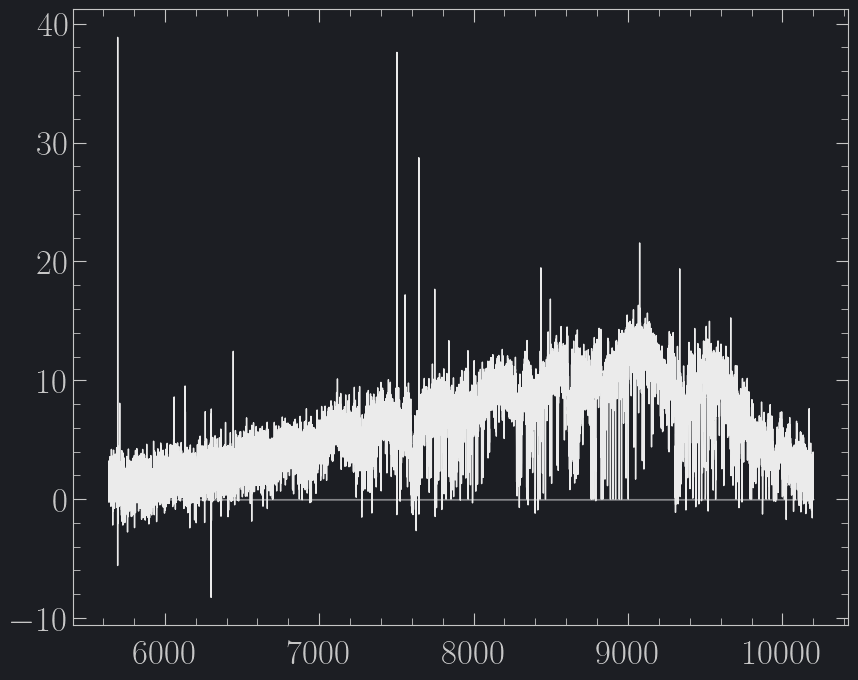

In [11]:
SNR = 10
continuum = 1e-17

# wave = np.arange(6520, 6630, 0.2) *u.AA

# flux = (default_rng().standard_normal(len(wave)) + SNR) * continuum * ergscm2AA
# error = continuum * np.ones(len(flux)) * ergscm2AA

# lines = ['H_alpha', 'NII_6584']
# lams = []
# for l in lines:
#     EL = EmissionLine(l)
#     lam0 = EL.properties['rest_awav']
#     lams.append(lam0)
#     flux = flux + gaussian_fct(x=wave, mean=lam0, stddev=2.0*u.AA, amplitude=8e-17*ergscm2AA)

# flux = flux.value
# wave = wave.value

flux_norm = flux/error
fig, ax = plt.subplots()
ax.plot(wave, flux_norm, lw=1, c='C12')
# ax.fill_between(wave.value, error.value, alpha=0.5,  color='C12')
ax.fill_between(wave, error, alpha=0.5,  color='C12')

plt.show()

In [14]:
from scipy.signal import find_peaks_cwt, find_peaks
from scipy.signal import convolve, cwt, ricker
from scipy.ndimage import gaussian_filter


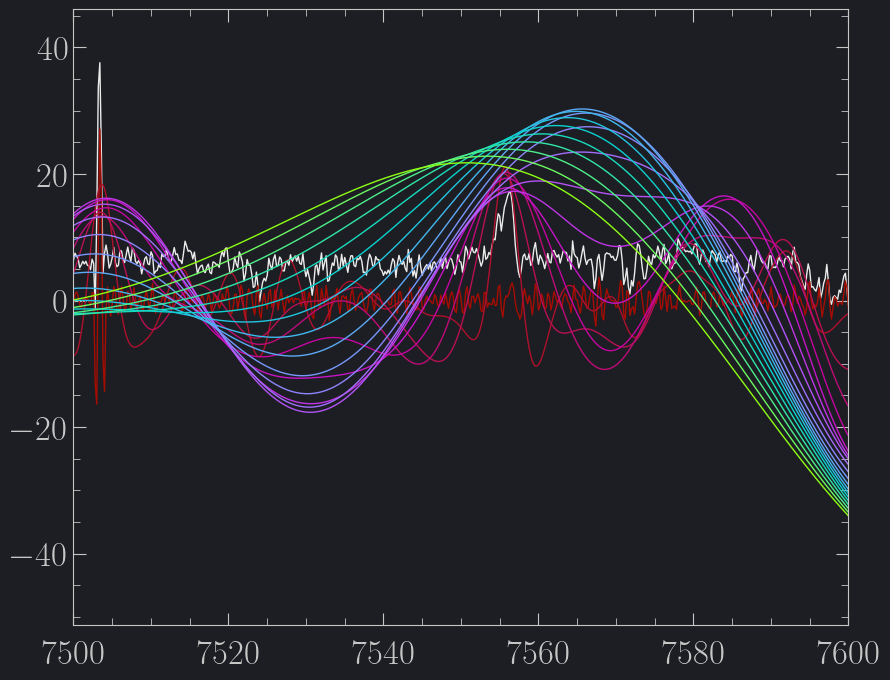

In [13]:


width = 10*u.AA
dlam = wave[1]-wave[0]
npix = width/dlam

widths = np.arange(1, 200, 10)
flux_convs = cwt(flux_norm, ricker, widths)

fig, ax = plt.subplots()
ax.plot(wave, flux_norm, lw=1, c='C12')

colors = cmr.take_cmap_colors('cmr.neon', len(widths), cmap_range=(0.0, 1), return_fmt='hex')

for i,f in enumerate(flux_convs):
    ax.plot(wave, f, lw=1, color=colors[i])
ax.set_xlim(7500, 7600)

plt.show()

575
334
204
171
135
108
82
67
59


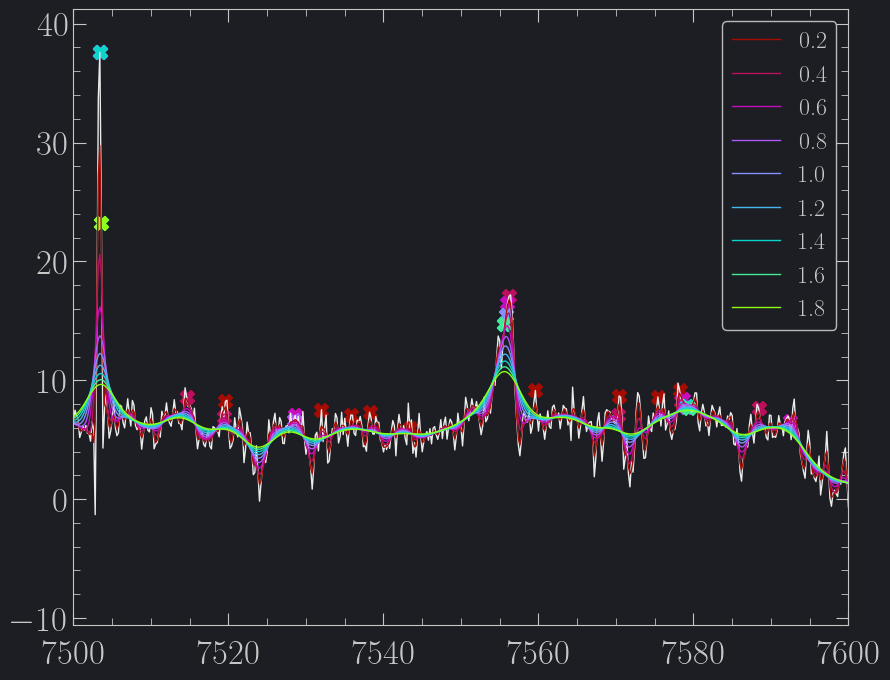

In [54]:
width = 10*u.AA
dlam = wave[1]-wave[0]
npix = width/dlam

widths = np.arange(1, 10, 1)
flux_convs = []
for w in widths:
    flux_convs.append(gaussian_filter(flux_norm, w))

fig, ax = plt.subplots()
ax.plot(wave, flux_norm, lw=1, c='C12')
peaks_arr = np.empty(0)
colors = cmr.take_cmap_colors('cmr.neon', len(widths), cmap_range=(0.0, 1), return_fmt='hex')
for i,f in enumerate(flux_convs):
    ax.plot(wave, f, lw=1, color=colors[i], label=f"{dlam*widths[i]:.1f}")
    peaks, properties = find_peaks(f, prominence=2, width=[5,100])
    print(len(peaks))
    peaks_arr =  np.concatenate((peaks_arr,peaks))
    ax.scatter(wave[peaks], flux_norm[peaks], marker='X', lw=1, color=colors[i])
#     plt.vlines(x=wave[peaks], ymin=flux_norm[peaks] - properties["prominences"],
#            ymax = flux_norm[peaks], color = colors[i])

#     plt.hlines(y=properties["width_heights"], xmin=wave[properties["left_ips"].astype(int)],
#            xmax=wave[properties["right_ips"].astype(int)], color = colors[i])
    
ax.legend()
ax.set_xlim(7500, 7600)
# ax.set_xlim(5700, 5800)
plt.show()

In [18]:
rng = default_rng()


In [46]:
x = rng.exponential(1, 3000)

In [47]:
shapiro(x)

ShapiroResult(statistic=0.808272123336792, pvalue=0.0)

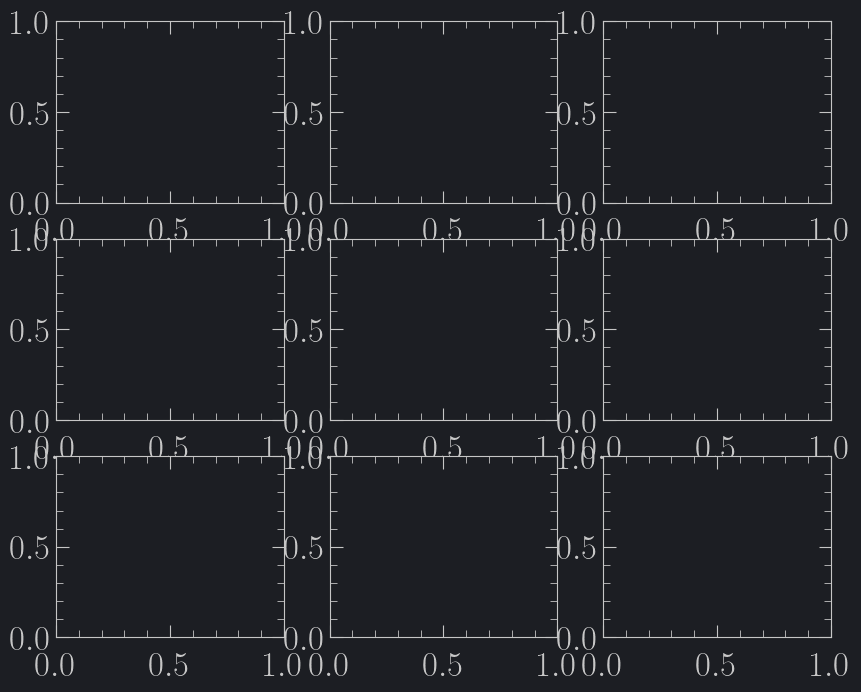

In [61]:
fig, _ = plt.subplots(3,3)

In [71]:
residuals_kw={'lw':3, 'residuals_hist_kw':{'lw':5}}
residuals_kw['color'] = residuals_kw.pop('color', 'C0')
residuals_kw['residuals_hist_kw'] = residuals_kw.pop('residuals_hist_kw', {})
residuals_kw['residuals_hist_kw']['color'] = residuals_kw['residuals_hist_kw'].pop('color', 'C0')

In [72]:
residuals_kw

{'lw': 3, 'color': 'C0', 'residuals_hist_kw': {'lw': 5, 'color': 'C0'}}

NameError: name 'Ha' is not defined